# [Double-Hard Debias: Tailoring Word Embeddings for Gender Bias Mitigation](https://arxiv.org/abs/2005.00965)

For more detailed explanations, please refer to the paper.

### Load embeddings

In [3]:
import codecs, os, json, operator, pickle
from random import shuffle
import numpy as np
from numpy import linalg as LA
import scipy

%load_ext autoreload
%autoreload 2

In [4]:
def load_glove(path):
    with open(path) as f:
        lines = f.readlines()
    
    wv = []
    vocab = []
    for line in lines:
        tokens = line.strip().split(" ")
        try:
            assert len(tokens) == 301
            vocab.append(tokens[0])
            wv.append([float(elem) for elem in tokens[1:]])
        except:
            print(line)
        
    w2i = {w: i for i, w in enumerate(vocab)}
    wv = np.array(wv).astype(float)
    print(len(vocab), wv.shape, len(w2i))
    
    return wv, w2i, vocab

def normalize(wv):
    
    # normalize vectors
    norms = np.apply_along_axis(LA.norm, 1, wv)
    wv = wv / norms[:, np.newaxis]
    return wv

def debias_gn(wv):
    for v in wv:
        assert(len(v) == 300)
    
    wv = wv[:,:-1]

    for v in wv:
        assert(len(v) == 299)
    return wv

In [5]:
glove, glove_w2i, vocab = load_glove("./data/vectors.txt")
gn_glove, gn_glove_w2i, gn_vocab = load_glove("./data/vectors300.txt")
gn_glove_a = debias_gn(gn_glove)

322636 (322636, 300) 322636
322636 (322636, 300) 322636


In [11]:
def load_glove_p(path):
    
    debiased_embeds = pickle.load(open(path, 'rb'))
    wv = []
    vocab = []
    for w in debiased_embeds:
        wv.append(np.array(debiased_embeds[w]))
        vocab.append(str(w))
        
    w2i = {w: i for i, w in enumerate(vocab)}
    wv = np.array(wv).astype(float)
    print(len(vocab), wv.shape, len(w2i))
        
    return wv, w2i, vocab
    
dhd_glove, dhd_glove_w2i, dhd_vocab = load_glove_p("./data/glove_dhd.p")

322636 (322636, 300) 322636


In [7]:
hd_glove, hd_glove_w2i, hd_vocab = load_glove(
    "./data/vectors_hd.txt")
hd_glove_a, hd_glove_a_w2i, hd_vocab_a = load_glove(
    "./data/vectors_hd_a.txt")

322636 (322636, 300) 322636
322636 (322636, 300) 322636


In [8]:
gp_glove, gp_glove_w2i, gp_vocab = load_glove(
    "./data/gp_glove.txt")
gp_gn_glove, gp_gn_glove_w2i, gp_gn_vocab = load_glove(
    "./data/gp_gn_glove.txt")

322636 300

322636 (322636, 300) 322636
322636 300

322636 (322636, 300) 322636


In [9]:
def simi(a, b):
    return 1-scipy.spatial.distance.cosine(a, b)

### Word Embedding Utility: Analogy & Concept Categorization

In [2]:
from eval import evaluate_cate, evaluate_ana, evaluate_analogy_google, evaluate_analogy_msr

In [10]:
evaluate_cate(glove, glove_w2i, vocab)

Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['ball']" is assigned class social_occasion
exist 401 in 402
Cluster purity on AP 0.5561097256857855
Sample data from ESSLI_1a, num of samples: 44 : "['mushroom']" is assigned class green-vegetable
exist 44 in 44
Cluster purity on ESSLI_1a 0.7272727272727273
Sample data from Battig, num of samples: 5231 : "new york" is assigned class state
exist 4125 in 5231
Cluster purity on Battig 0.4976969696969697
Sample data from BLESS, num of samples: 200 : "['acacia']" is assigned class tree
exist 200 in 200
Cluster purity on BLESS 0.81


In [158]:
evaluate_cate(hd_glove, hd_glove_w2i, hd_vocab)
evaluate_cate(hd_glove_a, hd_glove_a_w2i, hd_vocab_a)

Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['anger']" is assigned class feeling
exist 401 in 402
Cluster purity on AP 0.6234413965087282
Sample data from ESSLI_1a, num of samples: 44 : "['mushroom']" is assigned class green-vegetable
exist 44 in 44
Cluster purity on ESSLI_1a 0.7954545454545455
Sample data from Battig, num of samples: 5231 : "jazz" is assigned class type_of_music
exist 4125 in 5231
Cluster purity on Battig 0.5003636363636363
Sample data from BLESS, num of samples: 200 : "['blouse']" is assigned class clothing
exist 200 in 200
Cluster purity on BLESS 0.845
Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['anger']" is assigned class feeling
exist 401 in 402
Cluster purity on AP 0.6408977556109725
Sample data from ESSLI_1a, num of samples: 44 : "['mushroom']" is assigned class green-vegetable
exist 44 in 44
Cluster purity on ESSLI_1a 0.7954545454545455
Sample data from Battig, num of samples: 5231 : "

In [159]:
evaluate_cate(gn_glove, gn_glove_w2i, gn_vocab)
evaluate_cate(gn_glove_a, gn_glove_w2i, gn_vocab)

Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['anger']" is assigned class feeling
exist 401 in 402
Cluster purity on AP 0.5685785536159601
Sample data from ESSLI_1a, num of samples: 44 : "['mushroom']" is assigned class green-vegetable
exist 44 in 44
Cluster purity on ESSLI_1a 0.7045454545454546
Sample data from Battig, num of samples: 5231 : "jazz" is assigned class type_of_music
exist 4125 in 5231
Cluster purity on Battig 0.4945454545454545
Sample data from BLESS, num of samples: 200 : "['blouse']" is assigned class clothing
exist 200 in 200
Cluster purity on BLESS 0.85
Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['anger']" is assigned class feeling
exist 401 in 402
Cluster purity on AP 0.5685785536159601
Sample data from ESSLI_1a, num of samples: 44 : "['mushroom']" is assigned class green-vegetable
exist 44 in 44
Cluster purity on ESSLI_1a 0.75
Sample data from Battig, num of samples: 5231 : "jazz" is assign

In [12]:
evaluate_cate(gp_glove, gp_glove_w2i, gp_vocab)
evaluate_cate(gp_gn_glove, gp_gn_glove_w2i, gp_gn_vocab)
evaluate_cate(dhd_glove, dhd_glove_w2i, dhd_vocab)

Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['ball']" is assigned class social_occasion
exist 401 in 402
Cluster purity on AP 0.5610972568578554
Sample data from ESSLI_1a, num of samples: 44 : "['mushroom']" is assigned class green-vegetable
exist 44 in 44
Cluster purity on ESSLI_1a 0.7272727272727273
Sample data from Battig, num of samples: 5231 : "new york" is assigned class state
exist 4125 in 5231
Cluster purity on Battig 0.5081212121212121
Sample data from BLESS, num of samples: 200 : "['acacia']" is assigned class tree
exist 200 in 200
Cluster purity on BLESS 0.785
Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['ball']" is assigned class social_occasion
exist 401 in 402
Cluster purity on AP 0.6109725685785536
Sample data from ESSLI_1a, num of samples: 44 : "['mushroom']" is assigned class green-vegetable
exist 44 in 44
Cluster purity on ESSLI_1a 0.7272727272727273
Sample data from Battig, num of samples: 52

In [151]:
evaluate_ana(hd_glove_a, hd_glove_a_w2i, hd_vocab_a)
evaluate_ana(gn_glove_a, gn_glove_w2i, gn_vocab)
evaluate_ana(gp_glove, gp_glove_w2i, gp_vocab)
evaluate_ana(gp_gn_glove, gp_gn_glove_w2i, gp_gn_vocab)

6750
ACCURACY TOP1-MSR: 53.94% (3641/6750)
capital-common-countries.txt:
ACCURACY TOP1: 96.44% (488/506)
capital-world.txt:
ACCURACY TOP1: 96.35% (4359/4524)
currency.txt:
ACCURACY TOP1: 6.47% (56/866)
city-in-state.txt:
ACCURACY TOP1: 72.68% (1793/2467)
family.txt:
ACCURACY TOP1: 53.95% (273/506)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 20.97% (208/992)
gram2-opposite.txt:
ACCURACY TOP1: 28.82% (234/812)
gram3-comparative.txt:
ACCURACY TOP1: 85.36% (1137/1332)
gram4-superlative.txt:
ACCURACY TOP1: 48.93% (549/1122)
gram5-present-participle.txt:
ACCURACY TOP1: 63.26% (668/1056)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 91.99% (1471/1599)
gram7-past-tense.txt:
ACCURACY TOP1: 56.54% (882/1560)
gram8-plural.txt:
ACCURACY TOP1: 75.68% (1008/1332)
gram9-plural-verbs.txt:
ACCURACY TOP1: 58.28% (507/870)
Questions seen/total: 100.00% (19544/19544)
Semantic accuracy: 78.58%  (6969/8869)
Syntactic accuracy: 62.43%  (6664/10675)
Total accuracy: 69.76%  (13633/19544)
Analogy prediction

In [13]:
evaluate_ana(dhd_glove, dhd_glove_w2i, dhd_vocab)

6750
ACCURACY TOP1-MSR: 53.81% (3632/6750)
capital-common-countries.txt:
ACCURACY TOP1: 96.44% (488/506)
capital-world.txt:
ACCURACY TOP1: 96.68% (4374/4524)
currency.txt:
ACCURACY TOP1: 6.00% (52/866)
city-in-state.txt:
ACCURACY TOP1: 74.67% (1842/2467)
family.txt:
ACCURACY TOP1: 83.60% (423/506)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 21.07% (209/992)
gram2-opposite.txt:
ACCURACY TOP1: 28.33% (230/812)
gram3-comparative.txt:
ACCURACY TOP1: 84.46% (1125/1332)
gram4-superlative.txt:
ACCURACY TOP1: 47.42% (532/1122)
gram5-present-participle.txt:
ACCURACY TOP1: 62.88% (664/1056)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 91.99% (1471/1599)
gram7-past-tense.txt:
ACCURACY TOP1: 54.62% (852/1560)
gram8-plural.txt:
ACCURACY TOP1: 76.43% (1018/1332)
gram9-plural-verbs.txt:
ACCURACY TOP1: 55.06% (479/870)
Questions seen/total: 100.00% (19544/19544)
Semantic accuracy: 80.94%  (7179/8869)
Syntactic accuracy: 61.64%  (6580/10675)
Total accuracy: 70.40%  (13759/19544)


/zf15/tw8cb/anaconda3/lib/python3.7/site-packages/web-0.0.1-py3.7.egg/web/evaluate.py:158: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  prot_left = np.mean(np.vstack(w.get(word, mean_vector) for word in prototypes[:, 0]), axis=0)
/zf15/tw8cb/anaconda3/lib/python3.7/site-packages/web-0.0.1-py3.7.egg/web/evaluate.py:159: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  prot_right = np.mean(np.vstack(w.get(word, mean_vector) for word in prototypes[:, 1]), axis=0)
/zf15/tw8cb/anaconda3/lib/python3.7/site-packages/web-0.0.1-py3.7.egg/web/evaluate.py:162: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-

Analogy prediction accuracy on SemEval2012 0.17303299182822923


## Gender Bias Evaluation:
### Restrict vocabulary

In [17]:
from tqdm import tqdm
from utils import limit_vocab

gender_specific = []

with open('./data/male_word_file.txt') as f:
    for l in f:
        gender_specific.append(l.strip())
with open('./data/female_word_file.txt') as f:
    for l in f:
        gender_specific.append(l.strip())
print(len(gender_specific))

with codecs.open('./data/gender_specific_full.json') as f:
    gender_specific.extend(json.load(f))


exclude_words = gender_specific
print(len(exclude_words))

glove_vocab_limit, glove_limit, glove_w2i_limit = limit_vocab(glove, glove_w2i, vocab, exclude = exclude_words)

100%|██████████| 50000/50000 [00:00<00:00, 274368.85it/s]

442
1883
size of vocabulary: 47628


In [18]:
gn_vocab_limit, gn_limit, gn_w2i_limit = limit_vocab(gn_glove, gn_glove_w2i, gn_vocab, exclude = exclude_words)

100%|██████████| 50000/50000 [00:00<00:00, 389222.82it/s]


size of vocabulary: 47628


In [19]:
gn_a_vocab_limit, gn_a_limit, gn_a_w2i_limit = limit_vocab(
    gn_glove_a, gn_glove_w2i, gn_vocab, exclude = exclude_words)

100%|██████████| 50000/50000 [00:00<00:00, 286433.57it/s]


size of vocabulary: 47628


In [20]:
gp_vocab_limit, gp_limit, gp_w2i_limit = limit_vocab(
    gp_glove, gp_glove_w2i, gp_vocab, exclude = exclude_words)
gp_gn_vocab_limit, gp_gn_limit, gp_gn_w2i_limit = limit_vocab(
    gp_gn_glove, gp_gn_glove_w2i, gp_gn_vocab, exclude = exclude_words)

hd_vocab_limit, hd_limit, hd_w2i_limit = limit_vocab(
    hd_glove, hd_glove_w2i, hd_vocab, exclude = exclude_words)
hd_a_vocab_limit, hd_a_limit, hd_a_w2i_limit = limit_vocab(
    hd_glove_a, hd_glove_a_w2i, hd_vocab_a, exclude = exclude_words)

  0%|          | 0/50000 [00:00<?, ?it/s]

size of vocabulary: 47628


  0%|          | 0/50000 [00:00<?, ?it/s]

size of vocabulary: 47628


  0%|          | 0/50000 [00:00<?, ?it/s]

size of vocabulary: 47628


100%|██████████| 50000/50000 [00:00<00:00, 376660.59it/s]


size of vocabulary: 47628


In [21]:
dhd_vocab_limit, dhd_limit, dhd_w2i_limit = limit_vocab(
    dhd_glove, dhd_glove_w2i, dhd_vocab, exclude = exclude_words)

100%|██████████| 50000/50000 [00:00<00:00, 499453.90it/s]


size of vocabulary: 47628


### Select originally top biased words

In [196]:
he_embed = glove[glove_w2i['he'], :]
she_embed = glove[glove_w2i['she'], :]

def simi(a, b):
    return 1-scipy.spatial.distance.cosine(a, b)

def compute_bias_by_projection(wv, w2i, vocab):
    d = {}
    for w in vocab:
        u = wv[w2i[w], :]
        d[w] = simi(u, he_embed) - simi(u, she_embed)
    return d

gender_bias_bef = compute_bias_by_projection(glove_limit, glove_w2i_limit, glove_vocab_limit)
sorted_g = sorted(gender_bias_bef.items(), key=operator.itemgetter(1))

### TSNE visualization of originally top biased words

In [243]:
def visualize(vectors, y_true, y_pred, ax, title, random_state):
    
    # perform TSNE
    vectors = normalize(vectors)
    X_embedded = TSNE(n_components=2, random_state=random_state).fit_transform(vectors)
    for x,p,y in zip(X_embedded, y_pred, y_true):
        if y:
            ax.scatter(x[0], x[1], marker = '.', c = 'c')
        else:
            ax.scatter(x[0], x[1], marker = 'x', c = 'darkviolet')
    
    return ax

def cluster_and_visualize(words, X1, title, random_state, tsne_random_state, y_true, num=2):
    
    kmeans_1 = KMeans(n_clusters=num, random_state=random_state).fit(X1)
    y_pred_1 = kmeans_1.predict(X1)
    correct = [1 if item1 == item2 else 0 for (item1,item2) in zip(y_true, y_pred_1) ]
    print('precision', max(sum(correct)/float(len(correct)), 1 - sum(correct)/float(len(correct))))
    
    fig, axs = plt.subplots(1, 1, figsize=(6, 3))
    ax1 = visualize(X1, y_true, y_pred_1, axs, title, tsne_random_state)
    
#     fig.savefig("a_{}_{}_{}.pdf".format(title, size, random_state))


In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from utils import extract_vectors
import operator
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline

size=200
female = [item[0] for item in sorted_g[:size]]
male = [item[0] for item in sorted_g[-size:]]
y_true = [1]*size + [0]*size

In [245]:
# You may change the random states to get more visualization result
random_state = 0
tsne_random_state = 5

precision 1.0


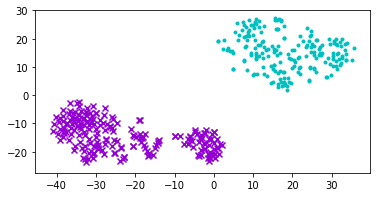

In [246]:
cluster_and_visualize(male + female, extract_vectors(male + female, glove_limit, glove_w2i_limit), 
                          'GloVe', random_state, tsne_random_state, y_true)

precision 0.7775


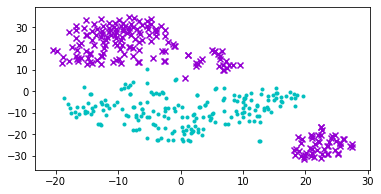

In [247]:
cluster_and_visualize(male + female, extract_vectors(male + female, hd_limit, hd_w2i_limit), 
                          'Hard-GloVe', random_state, tsne_random_state, y_true)

precision 0.7775


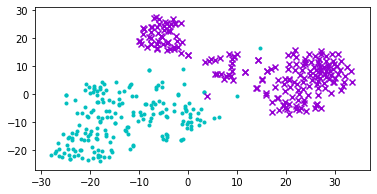

In [248]:
cluster_and_visualize(male + female, extract_vectors(male + female, hd_a_limit, hd_a_w2i_limit), 
                          ' Strong-Hard-GloVe', random_state, tsne_random_state, y_true)

precision 0.6225


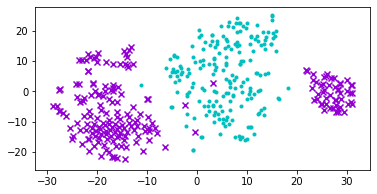

In [244]:
cluster_and_visualize(male + female, extract_vectors(male + female, dhd_limit, dhd_w2i_limit), 
                          'Double-Hard-GloVe', random_state, tsne_random_state, y_true)

precision 1.0


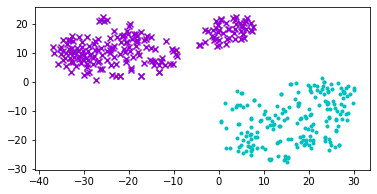

In [249]:
cluster_and_visualize(male + female, extract_vectors(male + female, gn_limit, gn_w2i_limit), 
                          'GN-GloVe', random_state, tsne_random_state, y_true)

precision 0.9975


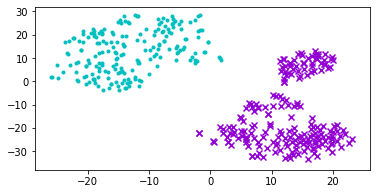

In [250]:
cluster_and_visualize(male + female, extract_vectors(male + female, gn_a_limit, gn_a_w2i_limit), 
                          'GN-GloVe_a', random_state, tsne_random_state,  y_true)

precision 1.0


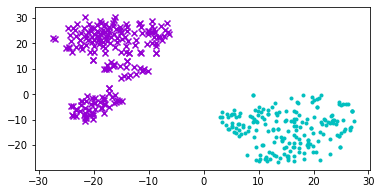

In [251]:
cluster_and_visualize(male + female, extract_vectors(male + female, gp_limit, gp_w2i_limit), 
                          'GP-GloVe', random_state, tsne_random_state,  y_true)

precision 1.0


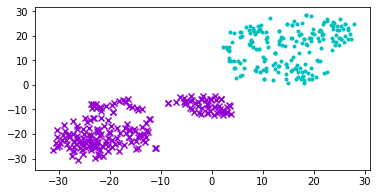

In [252]:
cluster_and_visualize(male + female, extract_vectors(male + female, gp_gn_limit, gp_gn_w2i_limit), 
                          'GP-GN-GloVe', random_state, tsne_random_state, y_true)

### Cluster originally top biased words
Following results may be slightly different from the numbers reported in the paper. This is due to:

1. how we select top biased words. Here, we select ones with largest similarities with **he** and **she** without normalizing embeddings, however, this may not be the perfect way. Other options can be:
    - normalize word embeddings first and then pick top biased words.
    - select according to projections on the difference vector of **he** and **she**.
2. different random state used in the clustering algorithm.

We care more about the relative clustering acc change and we see significant decrease with Double-Hard Debiased embeddings.

In [220]:
def cluster(words, X1, random_state, y_true, num=2):
    
    kmeans_1 = KMeans(n_clusters=num, random_state=random_state).fit(X1)
    y_pred_1 = kmeans_1.predict(X1)
    correct = [1 if item1 == item2 else 0 for (item1,item2) in zip(y_true, y_pred_1) ]
    print('precision', max(sum(correct)/float(len(correct)), 1 - sum(correct)/float(len(correct))))

In [221]:
# Cluster most biased words before and after debiasing

def my_cluster(wv, w2i, start=0, size=500, random_state = 1):
    
    if start == 0:
        female = [item[0] for item in sorted_g[:size]]
        male = [item[0] for item in sorted_g[-size:]]
    else:
        female = [item[0] for item in sorted_g[start:size+start]]
        male = [item[0] for item in sorted_g[-(start+size):-start]]

    y_true = [1]*size + [0]*size
    
    cluster(male + female, extract_vectors(male + female, wv, w2i), random_state, y_true)

In [239]:
random_state_=0
start=0
end=100
my_cluster(glove_limit, glove_w2i_limit, start, end, random_state=random_state_)
my_cluster(hd_limit, hd_w2i_limit, start, end, random_state=random_state_)
my_cluster(hd_a_limit, hd_a_w2i_limit, start, end, random_state=random_state_)
my_cluster(gn_limit, gn_w2i_limit, start, end, random_state=random_state_)
my_cluster(gn_a_limit, gn_a_w2i_limit, start, end, random_state=random_state_)
my_cluster(gp_limit, gp_w2i_limit, start, end, random_state=random_state_)
my_cluster(gp_gn_limit, gp_gn_w2i_limit, start, end, random_state=random_state_)
my_cluster(dhd_limit, dhd_w2i_limit, start, end, random_state=random_state_)

precision 1.0
precision 0.765
precision 0.765
precision 1.0
precision 1.0
precision 1.0
precision 1.0
precision 0.665


In [224]:
random_state_=0
start=0
end=500
my_cluster(glove_limit, glove_w2i_limit, start, end, random_state=random_state_)
my_cluster(hd_limit, hd_w2i_limit, start, end, random_state=random_state_)
my_cluster(hd_a_limit, hd_a_w2i_limit, start, end, random_state=random_state_)
my_cluster(gn_limit, gn_w2i_limit, start, end, random_state=random_state_)
my_cluster(gn_a_limit, gn_a_w2i_limit, start, end, random_state=random_state_)
my_cluster(gp_limit, gp_w2i_limit, start, end, random_state=random_state_)
my_cluster(gp_gn_limit, gp_gn_w2i_limit, start, end, random_state=random_state_)
my_cluster(dhd_limit, dhd_w2i_limit, start, end, random_state=random_state_)

precision 1.0
precision 0.8029999999999999
precision 0.8029999999999999
precision 1.0
precision 0.995
precision 1.0
precision 1.0
precision 0.741


In [58]:
random_state_= 0
start=0
end=1000
my_cluster(glove_limit, glove_w2i_limit, start, end, random_state=random_state_)
my_cluster(hd_limit, hd_w2i_limit, start, end, random_state=random_state_)
my_cluster(hd_a_limit, hd_a_w2i_limit, start, end, random_state=random_state_)
my_cluster(gn_limit, gn_w2i_limit, start, end, random_state=random_state_)
my_cluster(gn_a_limit, gn_a_w2i_limit, start, end, random_state=random_state_)
my_cluster(gp_limit, gp_w2i_limit, start, end, random_state=random_state_)
my_cluster(gp_gn_limit, gp_gn_w2i_limit, start, end, random_state=random_state_)
my_cluster(dhd_limit, dhd_w2i_limit, start, end, random_state=random_state_)

precision 1.0
precision 0.8025
precision 0.8025
precision 0.998
precision 0.8945
precision 1.0
precision 0.9995
precision 0.704


### Classification experiment

We also test classification experiment as described in [Lipstick on a Pig](https://arxiv.org/abs/1903.03862). However, we don't see any significant improvement on any debiasing approaches. We suspect that classification may not reflect gender bia correctly as it can always find a decision boundary with supervisions which may not be gender. 

In [73]:
from sklearn import svm
from random import shuffle
import random
from utils import train_and_predict

def cls(wv, w2i, vocab, size_train, size_test):
    size = size_train + size_test
    females = [item[0] for item in sorted_g[:size]]
    males = [item[0] for item in sorted_g[-size:]]
    males.reverse()

    shuffle(females)
    shuffle(males)

    train_and_predict(wv, w2i, vocab, size_train, size_test, males, females)

In [74]:
size_train=100
size_test=1000
cls(glove_limit, glove_w2i_limit, glove_vocab_limit, size_train, size_test)
cls(hd_limit, hd_w2i_limit, hd_vocab_limit, size_train, size_test)
cls(hd_a_limit, hd_a_w2i_limit, hd_a_vocab_limit, size_train, size_test)
cls(gn_limit, gn_w2i_limit, gn_vocab_limit, size_train, size_test)
cls(gn_a_limit, gn_a_w2i_limit, gn_a_vocab_limit, size_train, size_test)
cls(gp_limit, gp_w2i_limit, gp_vocab_limit, size_train, size_test)
cls(gp_gn_limit, gp_gn_w2i_limit, gp_gn_vocab_limit, size_train, size_test)
cls(dhd_limit, dhd_w2i_limit, dhd_vocab_limit, size_train, size_test)

accuracy: 1.0
accuracy: 0.9105
accuracy: 0.9265
accuracy: 1.0
accuracy: 0.9935
accuracy: 0.995
accuracy: 1.0
accuracy: 0.8905


### Association Experiments (Calisken et al.)

In [81]:
from utils import p_value_exhust, effect_size
from utils import WEAT_words

A = WEAT_words['A']
B = WEAT_words['B']
C = WEAT_words['C']
D = WEAT_words['D']
# C = WEAT_words['E']
# D = WEAT_words['F']
# C = WEAT_words['G']
# D = WEAT_words['H']

A = [elem.lower() for elem in A]
A = ['john', 'paul', 'mike', 'kevin', 'steve', 'greg', 'jeff', 'tom']
B = [elem.lower() for elem in B]
B = ['amy', 'joan', 'lisa', 'sarah', 'diana', 'kate', 'ann', 'donna']
C = [elem.lower() for elem in C]
D = [elem.lower() for elem in D]
print(A)
print(B)
print(C)
print(D)

['john', 'paul', 'mike', 'kevin', 'steve', 'greg', 'jeff', 'tom']
['amy', 'joan', 'lisa', 'sarah', 'diana', 'kate', 'ann', 'donna']
['executive', 'management', 'professional', 'corporation', 'salary', 'office', 'business', 'career']
['home', 'parents', 'children', 'family', 'cousins', 'marriage', 'wedding', 'relatives']


In [82]:
print(effect_size(A, B, C, D, glove, glove_w2i, vocab))
print(effect_size(A, B, C, D, hd_glove, hd_glove_w2i, hd_vocab))
print(effect_size(A, B, C, D, hd_glove_a, hd_glove_a_w2i, hd_vocab_a))
print(effect_size(A, B, C, D, gn_glove, gn_glove_w2i, gn_vocab))
print(effect_size(A, B, C, D, gn_glove_a, gn_glove_w2i, gn_vocab))
print(effect_size(A, B, C, D, gp_glove, gp_glove_w2i, gp_vocab))
print(effect_size(A, B, C, D, gp_gn_glove, gp_gn_glove_w2i, gp_gn_vocab))
print(effect_size(A, B, C, D, dhd_glove, dhd_glove_w2i, dhd_vocab))

1.805996189486473
1.546645694968245
1.5466455821704757
1.8211045958742451
1.7554763167372835
1.8058846500019743
1.7974306940681066
1.5313012260878656


In [83]:
print(p_value_exhust(A, B, C, D, glove, glove_w2i, vocab))
print(p_value_exhust(A, B, C, D, hd_glove, hd_glove_w2i, hd_vocab))
print(p_value_exhust(A, B, C, D, hd_glove_a, hd_glove_a_w2i, hd_vocab_a))
print(p_value_exhust(A, B, C, D, gn_glove, gn_glove_w2i, gn_vocab))
print(p_value_exhust(A, B, C, D, gn_glove_a, gn_glove_w2i, gn_vocab))
print(p_value_exhust(A, B, C, D, gp_glove, gp_glove_w2i, gp_vocab))
print(p_value_exhust(A, B, C, D, gp_gn_glove, gp_gn_glove_w2i, gp_gn_vocab))
print(p_value_exhust(A, B, C, D, dhd_glove, dhd_glove_w2i, dhd_vocab))

num of samples 12870
0.0
num of samples 12870
0.0001554001554001554
num of samples 12870
0.0001554001554001554
num of samples 12870
0.0
num of samples 12870
0.0
num of samples 12870
0.0
num of samples 12870
0.0
num of samples 12870
0.0001554001554001554
